# Solving Nonlinear Equations and Finding Roots

In physics, we often encounter non-linear equations, which are significantly harder to solve than linear equations.  We will cover three methods to solve such equations.

Consider the equation $x + e^{-x} = 2$.  There is one value of $x$ for which this is true. However, there is no known analytic method to find this value. Instead, we must use numerical techniques.

## Relaxation method

The relaxation method is an iterative method for solving non-linear equations. The method works as follows: 
 1) Rearrange the equation into the form $x=f(x)$
 2) Guess a value for $x$
 3) Evaluate the right hand side of the equation $f(x)$
    *  Use this value as a new guess for $x$
 1) Repeat step 3 until the method converges to a particular value (the solution)
 
Let's apply this method to solve $x + e^{-x} = 2$.  First we rearrange the equation to obtain $x = 2 - e^{-x}$.  Let's use $x=0$ as our initial guess, and iterate.

In [1]:
import math

guess = 0.0   #initial guess

def f(x):
    return 2 - math.exp(-x)

def relaxation(f, guess, tolerance=1e-10, maxTries=40):
    x = guess

    print("{:2} | {:14} | {:14}".format("n", "x", "f(x)")) 

    n = 0
    while n<maxTries:
        n += 1

        xPrime = f(x)
       
        print("{:2} | {:.12f} | {:.12f}".format(n,x,xPrime))
        
        if abs(x-xPrime) < tolerance: break   #break out of the loop upon convergence
        x = xPrime   #update to new guess
        
relaxation(f, guess)

n  | x              | f(x)          
 1 | 0.000000000000 | 1.000000000000
 2 | 1.000000000000 | 1.632120558829
 3 | 1.632120558829 | 1.804485465847
 4 | 1.804485465847 | 1.835440893922
 5 | 1.835440893922 | 1.840456855344
 6 | 1.840456855344 | 1.841255113911
 7 | 1.841255113911 | 1.841381782813
 8 | 1.841381782813 | 1.841401873536
 9 | 1.841401873536 | 1.841405059855
10 | 1.841405059855 | 1.841405565188
11 | 1.841405565188 | 1.841405645331
12 | 1.841405645331 | 1.841405658041
13 | 1.841405658041 | 1.841405660057
14 | 1.841405660057 | 1.841405660377
15 | 1.841405660377 | 1.841405660427


We have converged to a "fixed point" and can stop iterating; since we found a value of $x$ which is equal to $f(x)$, 1.8414 is a solution to the equation and we can stop iterating.

---------------------

The pros of this method are:
* Fast and easy to code
* Finds *a* solution *sometimes*


The cons of this method are:
* Can't find multiple solutions (which often exist) 
    * Can be mitigated by trying multiple different guesses (which sometimes converge to differnt solutions)
* Can get stuck and oscillate about true solution (no convergence)

To understand this last point, let's try to solve the equation $x=e^{1-x^2}$.

In [2]:
def f(x):
    return math.exp(1-x*x)

relaxation(f, guess)

n  | x              | f(x)          
 1 | 0.000000000000 | 2.718281828459
 2 | 2.718281828459 | 0.001679841057
 3 | 0.001679841057 | 2.718274157843
 4 | 2.718274157843 | 0.001679911111
 5 | 0.001679911111 | 2.718274157203
 6 | 2.718274157203 | 0.001679911117
 7 | 0.001679911117 | 2.718274157203
 8 | 2.718274157203 | 0.001679911117
 9 | 0.001679911117 | 2.718274157203
10 | 2.718274157203 | 0.001679911117
11 | 0.001679911117 | 2.718274157203
12 | 2.718274157203 | 0.001679911117
13 | 0.001679911117 | 2.718274157203
14 | 2.718274157203 | 0.001679911117
15 | 0.001679911117 | 2.718274157203
16 | 2.718274157203 | 0.001679911117
17 | 0.001679911117 | 2.718274157203
18 | 2.718274157203 | 0.001679911117
19 | 0.001679911117 | 2.718274157203
20 | 2.718274157203 | 0.001679911117
21 | 0.001679911117 | 2.718274157203
22 | 2.718274157203 | 0.001679911117
23 | 0.001679911117 | 2.718274157203
24 | 2.718274157203 | 0.001679911117
25 | 0.001679911117 | 2.718274157203
26 | 2.718274157203 | 0.001679911117
2

You can see that the method doesn't converge to a particular solution, but instead oscillates between 0.00168 and 2.71827 (neither of which are solutions).  

In such cases, we can sometimes ensure convergence by rearranging the equation.  For example, let's invert this equation by taking the natural log of both sides of the equation, after which we obtain $\ln(x) = 1-x^2$ or $x = \sqrt{1-\ln(x)}$.

In [3]:
guess = 0.1   #can't use zero as initial guess due to domain of ln

def f(x):
    return math.sqrt(1-math.log(x))

relaxation(f, guess)

n  | x              | f(x)          
 1 | 0.100000000000 | 1.817301596597
 2 | 1.817301596597 | 0.634544906481
 3 | 0.634544906481 | 1.206170477062
 4 | 1.206170477062 | 0.901415306201
 5 | 0.901415306201 | 1.050613719877
 6 | 1.050613719877 | 0.975000262287
 7 | 0.975000262287 | 1.012579645742
 8 | 1.012579645742 | 0.993729752314
 9 | 0.993729752314 | 1.003140064124
10 | 1.003140064124 | 0.998431197219
11 | 0.998431197219 | 1.000784709436
12 | 1.000784709436 | 0.999607722203
13 | 0.999607722203 | 1.000196158140
14 | 1.000196158140 | 0.999901925739
15 | 0.999901925739 | 1.000049038333
16 | 1.000049038333 | 0.999975481134
17 | 0.999975481134 | 1.000012259508
18 | 1.000012259508 | 0.999993870265
19 | 0.999993870265 | 1.000003064872
20 | 1.000003064872 | 0.999998467565
21 | 0.999998467565 | 1.000000766218
22 | 1.000000766218 | 0.999999616891
23 | 0.999999616891 | 1.000000191554
24 | 1.000000191554 | 0.999999904223
25 | 0.999999904223 | 1.000000047889
26 | 1.000000047889 | 0.999999976056
2

In this case, the method eventually converged to $x=1$, which is the correct solution.

The reason for this has to do with the slope of the function on the right-hand side of the equations we are trying to solve.  The relaxation method only converges if the absolute value of the slope of this function, evaluated at the true solution $x^{\star}$, is less than one.  

Initially, we tried to solve with $f(x) = e^{1-x^2}$.  The derivative of this function is $f^{\prime}(x) = -2xe^{1-x^2}$, with absolute value $2\cdot1\cdot e^{1-1^2} = 2$ when evaluated at $x^{\star}=1$.  However, after inverting the equation we obtained $f(x)=\sqrt{1-\ln(x)}$.  The derivative of this function is $f^{\prime}(x) = \frac{-1}{2x\sqrt{1-\ln(x)}}$, with absolute value $\frac{1}{2\cdot1\cdot\sqrt{1-\ln(1)}} = \frac{1}{2}$ when evaluated at $x^{\star}=1$, so the method converges.

The slope of the inverse function is simply the inverse of the original slope.  This is a general relation, so taking the inverse function is a good method to obtain convergence with the relaxation method.  However, it is not foolproof, as some functions can't be inverted.

---------------

Let's now try to apply this method to solve the equation $x=\tanh(x/0.7)$.  But first, lets graph the right- and left-hand sides of this equation.  The solution(s) correspond to point(s) where these functions intersect.

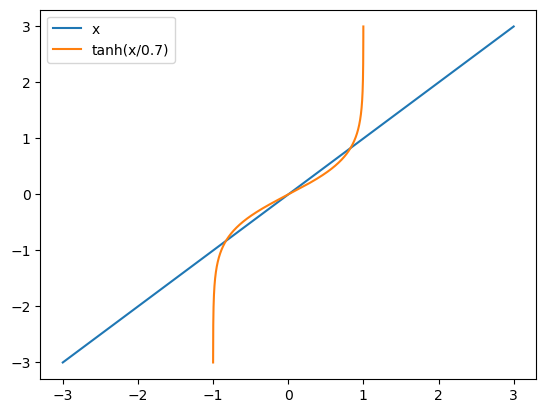

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#left-hand side
def f0(x):
    return x

#right-hand side
def f1(x):
    return np.tanh(x/0.7)

x = np.linspace(-3, 3, 1000)

plt.figure()

plt.plot(f0(x), x, label='x')
plt.plot(f1(x), x, label='tanh(x/0.7)')

plt.legend(loc='best')

In this case, there are three solutions.  We can try to find them using the relaxation method, by trying multiple initial guesses.

In [5]:
guess = -0.000000001

relaxation(f1, guess, maxTries=100)

n  | x              | f(x)          
 1 | -0.000000001000 | -0.000000001429
 2 | -0.000000001429 | -0.000000002041
 3 | -0.000000002041 | -0.000000002915
 4 | -0.000000002915 | -0.000000004165
 5 | -0.000000004165 | -0.000000005950
 6 | -0.000000005950 | -0.000000008500
 7 | -0.000000008500 | -0.000000012143
 8 | -0.000000012143 | -0.000000017347
 9 | -0.000000017347 | -0.000000024781
10 | -0.000000024781 | -0.000000035401
11 | -0.000000035401 | -0.000000050573
12 | -0.000000050573 | -0.000000072248
13 | -0.000000072248 | -0.000000103211
14 | -0.000000103211 | -0.000000147444
15 | -0.000000147444 | -0.000000210634
16 | -0.000000210634 | -0.000000300906
17 | -0.000000300906 | -0.000000429866
18 | -0.000000429866 | -0.000000614095
19 | -0.000000614095 | -0.000000877278
20 | -0.000000877278 | -0.000001253254
21 | -0.000001253254 | -0.000001790363
22 | -0.000001790363 | -0.000002557662
23 | -0.000002557662 | -0.000003653803
24 | -0.000003653803 | -0.000005219718
25 | -0.000005219718 | -0.0

Unfortunately, it seems this method is not capable of finding the solution at $x=0$, even if we choose an initial guess which is very close to zero.  The same is also true if our initial guess is small and positive.

In [6]:
guess = 0.000000001

relaxation(f1, guess, maxTries=100)

n  | x              | f(x)          
 1 | 0.000000001000 | 0.000000001429
 2 | 0.000000001429 | 0.000000002041
 3 | 0.000000002041 | 0.000000002915
 4 | 0.000000002915 | 0.000000004165
 5 | 0.000000004165 | 0.000000005950
 6 | 0.000000005950 | 0.000000008500
 7 | 0.000000008500 | 0.000000012143
 8 | 0.000000012143 | 0.000000017347
 9 | 0.000000017347 | 0.000000024781
10 | 0.000000024781 | 0.000000035401
11 | 0.000000035401 | 0.000000050573
12 | 0.000000050573 | 0.000000072248
13 | 0.000000072248 | 0.000000103211
14 | 0.000000103211 | 0.000000147444
15 | 0.000000147444 | 0.000000210634
16 | 0.000000210634 | 0.000000300906
17 | 0.000000300906 | 0.000000429866
18 | 0.000000429866 | 0.000000614095
19 | 0.000000614095 | 0.000000877278
20 | 0.000000877278 | 0.000001253254
21 | 0.000001253254 | 0.000001790363
22 | 0.000001790363 | 0.000002557662
23 | 0.000002557662 | 0.000003653803
24 | 0.000003653803 | 0.000005219718
25 | 0.000005219718 | 0.000007456740
26 | 0.000007456740 | 0.000010652486
2

With the relaxation method, we are only able to find the solutions at $x=\pm 0.8286$.

### Multiple variables

The relaxation method can easily be extended to systems of equations with multiple variables.  Suppose we wish to solve $x=\sqrt{x-\frac{2-y}{y}}$ and $y=\frac{x}{1+y^2}$.  We simply guess initial values for both $x$ and $y$, plug these value into the right-hand side of the equations, update our guesses, and repeat.

In [7]:
guessX = 1.0
guessY = 1.0

def f1(x,y):
    return math.sqrt(x + (2-y)/y)

def f2(x,y):
    return x/(1 + y*y)
    
def relaxation2(f1, f2, guessX, guessY, tolerance=1e-10, maxTries=40):
    x = guessX
    y = guessY

    print("{:2} | {:16} | {:16} | {:16} | {:16}".format("n", "x", "f1(x,y)", "y", "f2(x,y)") )

    n = 0
    while n<maxTries:
        n += 1

        xPrime = f1(x,y)
        yPrime = f2(x,y)
        
        print("{:2} | {:.14f} | {:.14f} | {:.14f} | {:.14f}".format(n, x, f1(x,y), y, f2(x,y)) )

        if abs(x-xPrime) < tolerance and abs(y-yPrime) < tolerance: break   #break out of the loop upon convergence
        #update to new guess
        x = xPrime
        y = yPrime
        
relaxation2(f1, f2, guessX, guessY)

n  | x                | f1(x,y)          | y                | f2(x,y)         
 1 | 1.00000000000000 | 1.41421356237310 | 1.00000000000000 | 0.50000000000000
 2 | 1.41421356237310 | 2.10100298961546 | 0.50000000000000 | 1.13137084989848
 3 | 2.10100298961546 | 1.69374435573431 | 1.13137084989848 | 0.92149253930503
 4 | 1.69374435573431 | 1.69237593854139 | 0.92149253930503 | 0.91595907832121
 5 | 1.69237593854139 | 1.69584185542866 | 0.91595907832121 | 0.92027916983689
 6 | 1.69584185542866 | 1.69384043963487 | 0.92027916983689 | 0.91820305903761
 7 | 1.69384043963487 | 1.69469993584450 | 0.91820305903761 | 0.91901867914668
 8 | 1.69469993584450 | 1.69438315218870 | 0.91901867914668 | 0.91873805916929
 9 | 1.69438315218870 | 1.69448581972779 | 0.91873805916929 | 0.91882320728291
10 | 1.69448581972779 | 1.69445658715303 | 0.91882320728291 | 0.91880092379114
11 | 1.69445658715303 | 1.69446353875444 | 0.91880092379114 | 0.91880547380437
12 | 1.69446353875444 | 1.69446240922996 | 0.9188054

## Binary search

The binary search method is somewhat more robust than the relaxation method.  It searches for a solution within a specified interval.  If *exactly one* solution exists in this interval, the binary search method is guarenteed to find it.  The price we pay for the increased robustness is increased complexity.

When using the binary search method, we begin by moving all terms to one side of the equation, obtaining an equation of the form $f(x)=0$.  We then proceed to find "roots" (zeroes) of the function $f(x)$.

Let's assume that we wish to find solutions in the interval between $x=a$ and $x=b$.  We begin by evaluating $f(x)$ at $a$ and $b$.  If the sign of $f(a)$ and $f(b)$ differ, then (assuming the function is continuous), there must be at least one intermediate point (the solution) where $f(x)$ crosses zero.  In this case, we divide the interval in half and evaluate the function at $x^{\prime}=\frac{1}{2}(a+b)$.  The sign of $f(x^{\prime})$ is guarenteed to differ with the sign of either $f(a)$ or $f(b)$.  Either way, we can determine which half-interval the solution falls within, and repeat until the interval becomes sufficiently small.  At that point, we take the average of the interval endpoints as our solution.

Let's use this method to find solutions to the equation $x = e^{-x} - 0.4$.  We begin by moving all terms to one side of the equation, obtaining $x - e^{-x} + 0.4 = 0$.  Then, we can search for roots in the interval 0-5.

In [8]:
a = 0
b = 5

def f(x):
    return x - np.exp(-x) + 0.4
    
def binarySearch(f, a, b, tolerance=1e-10):

    x1 = a
    x2 = b

    print("{:2} | {:14} | {:14}".format("n", "x1", "x2")) 
    
    n = 0
    while x2-x1>tolerance:
        n += 1
        
        print("{:2} | {:.12f} | {:.12f}".format(n,x1,x2))
        
        midpoint = .5*(x1+x2)
        f1,f2,fm = f(x1), f(x2), f(midpoint)
        
        if f1*f2 > 0:
            print("ERROR: Even number of roots within interval {}-{}".format(x1,x2))
            return None
    
        if   f1*fm < 0: x2 = midpoint
        elif f2*fm < 0: x1 = midpoint
        
    return .5*(x1+x2) 
        
binarySearch(f, a, b)

n  | x1             | x2            
 1 | 0.000000000000 | 5.000000000000
 2 | 0.000000000000 | 2.500000000000
 3 | 0.000000000000 | 1.250000000000
 4 | 0.000000000000 | 0.625000000000
 5 | 0.312500000000 | 0.625000000000
 6 | 0.312500000000 | 0.468750000000
 7 | 0.312500000000 | 0.390625000000
 8 | 0.312500000000 | 0.351562500000
 9 | 0.312500000000 | 0.332031250000
10 | 0.322265625000 | 0.332031250000
11 | 0.322265625000 | 0.327148437500
12 | 0.322265625000 | 0.324707031250
13 | 0.323486328125 | 0.324707031250
14 | 0.323486328125 | 0.324096679688
15 | 0.323486328125 | 0.323791503906
16 | 0.323486328125 | 0.323638916016
17 | 0.323562622070 | 0.323638916016
18 | 0.323562622070 | 0.323600769043
19 | 0.323562622070 | 0.323581695557
20 | 0.323562622070 | 0.323572158813
21 | 0.323562622070 | 0.323567390442
22 | 0.323562622070 | 0.323565006256
23 | 0.323563814163 | 0.323565006256
24 | 0.323564410210 | 0.323565006256
25 | 0.323564708233 | 0.323565006256
26 | 0.323564857244 | 0.323565006256
2

0.3235649563066545

However, the binary search method is not without disadvantages.  Let's also try to find solutions to the equation $x^2-2x+1 = 0$.

In [9]:
def f(x):
    return x*x - 2*x + 1

binarySearch(f, a, b)

n  | x1             | x2            
 1 | 0.000000000000 | 5.000000000000
ERROR: Even number of roots within interval 0-5


Here, the binary search method fails.  Let's plot the function to understand this.

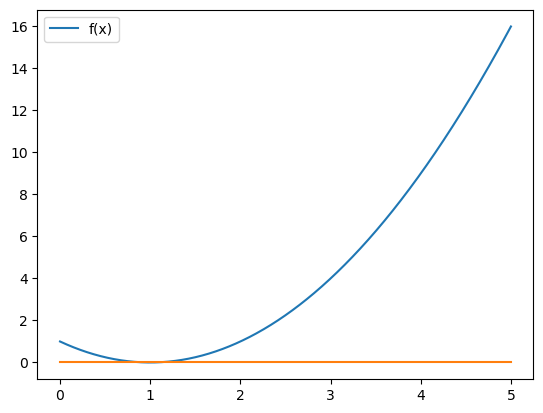

In [10]:
x = np.linspace(0, 5, 1000)

plt.figure()

plt.plot(x,f(x),label="f(x)")

plt.plot([0,5],[0,0])
plt.legend()

In this particular case, we have a double root at $x=1$, so the function doesn't cross zero (it merely touches it).  But the binary search begins by evaluating $f(a)$ and $f(b)$, which have the same sign.  So we can't use the binary seach to find the root of this function.

## Newton-Raphson method

The Newton-Raphson (NR) method is another option for solving non-linear equations.  Like the binary search method, we begin by rearranging the given equation into the form $f(x)=0$, and then we proceed to find the roots of $f(x)$.  Like the relaxation method, we try to guess a solution, then iteratively refine our guess until we (hopefully) converge at a solution.  However, in the NR method, we make use of the slope of the function to improve our estimate of the solution.

<center>
<div>
    <img src="../Images/fig6-6.png" width="500"/>
</div>
</center>

After rearanging our equation into the form $f(x)=0$, we guess a particular value $x$ and evaluate $f(x)$.  If this evaluates to zero (within some tolerance), we have a solution.  

If not, we calculate the derivative $f^{\prime}(x)=\frac{f(x)}{\Delta x}$.  We then approximate $f(x)$ as a linear function with this slope, and extrapolate to the point $x^{\prime}=x-\Delta x=x-\frac{f(x)}{f^{\prime}(x)}$, which becomes our new guess, and repeat until we obtain convergence.  Of course, this requires knowledge of $f^{\prime}(x)$.

---------------

Let's apply this technique to calculate the roots of $x^2-2x+1 = 0$.

n  | x              | xPrime        
 1 | 0.000000000000 | 0.500000000000
 2 | 0.500000000000 | 0.750000000000
 3 | 0.750000000000 | 0.875000000000
 4 | 0.875000000000 | 0.937500000000
 5 | 0.937500000000 | 0.968750000000
 6 | 0.968750000000 | 0.984375000000
 7 | 0.984375000000 | 0.992187500000
 8 | 0.992187500000 | 0.996093750000
 9 | 0.996093750000 | 0.998046875000
10 | 0.998046875000 | 0.999023437500
11 | 0.999023437500 | 0.999511718750
12 | 0.999511718750 | 0.999755859375
13 | 0.999755859375 | 0.999877929688
14 | 0.999877929688 | 0.999938964844
15 | 0.999938964844 | 0.999969482422
16 | 0.999969482422 | 0.999984741211
17 | 0.999984741211 | 0.999992370605
18 | 0.999992370605 | 0.999996185303
19 | 0.999996185303 | 0.999998092651
20 | 0.999998092651 | 0.999999046326
21 | 0.999999046326 | 0.999999523163
22 | 0.999999523163 | 0.999999761581
23 | 0.999999761581 | 0.999999880791
24 | 0.999999880791 | 0.999999940395
25 | 0.999999940395 | 0.999999970198
26 | 0.999999970198 | 0.999999985099
2

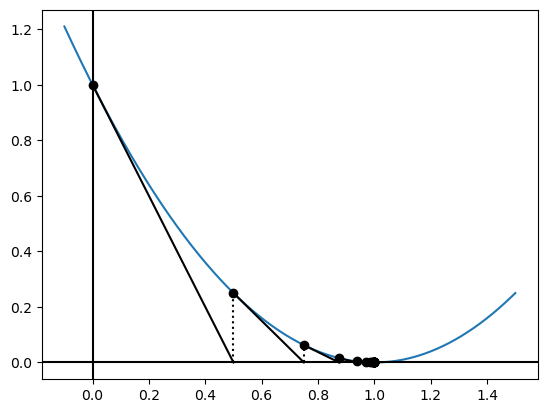

In [11]:
guess = 0.0   #initial guess

def f(x):
    return x*x - 2*x + 1

def fPrime(x):
    return 2*x - 2

def newtonRaphson(f, fPrime, guess, xMin, xMax, tolerance=1e-10, maxTries=40):
    x = guess

    print("{:2} | {:14} | {:14}".format("n", "x", "xPrime")) 

    ##################################################################################
    #Plotting
    xValues = np.linspace(xMin, xMax, 1000)
    plt.plot(xValues,f(xValues))
    plt.axvline(0, color='black')
    plt.axhline(0, color='black')
    ##################################################################################

    n = 0
    while n<maxTries:
        n += 1

        xPrime = x - f(x)/fPrime(x)
        print("{:2} | {:.12f} | {:.12f}".format(n,x,xPrime))
        ##################################################################################
        #Plotting   
        plt.plot([x], [f(x)],"ok")
        plt.plot([x,xPrime], [f(x),0], "k-")
        plt.plot([xPrime,xPrime],[0,f(xPrime)], "k:")
        ##################################################################################
        
        if abs(x-xPrime) < tolerance: break   #break out of the loop upon convergence
        x = xPrime   #update to new guess
           
newtonRaphson(f, fPrime, guess, -0.1, 1.5)

Using the NR method, we are able to find the root at $x=1$.

Let's apply the same method to calculate the roots of $x^3-2x-2$.

n  | x              | xPrime        
 1 | 0.000000000000 | -1.000000000000
 2 | -1.000000000000 | 0.000000000000
 3 | 0.000000000000 | -1.000000000000
 4 | -1.000000000000 | 0.000000000000
 5 | 0.000000000000 | -1.000000000000
 6 | -1.000000000000 | 0.000000000000
 7 | 0.000000000000 | -1.000000000000
 8 | -1.000000000000 | 0.000000000000
 9 | 0.000000000000 | -1.000000000000
10 | -1.000000000000 | 0.000000000000
11 | 0.000000000000 | -1.000000000000
12 | -1.000000000000 | 0.000000000000
13 | 0.000000000000 | -1.000000000000
14 | -1.000000000000 | 0.000000000000
15 | 0.000000000000 | -1.000000000000
16 | -1.000000000000 | 0.000000000000
17 | 0.000000000000 | -1.000000000000
18 | -1.000000000000 | 0.000000000000
19 | 0.000000000000 | -1.000000000000
20 | -1.000000000000 | 0.000000000000
21 | 0.000000000000 | -1.000000000000
22 | -1.000000000000 | 0.000000000000
23 | 0.000000000000 | -1.000000000000
24 | -1.000000000000 | 0.000000000000
25 | 0.000000000000 | -1.000000000000
26 | -1.00000

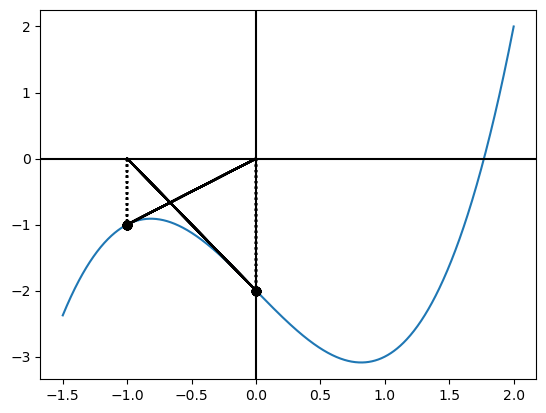

In [12]:
def f(x):
    return x*x*x - 2*x - 2

def fPrime(x):
    return 3*x*x - 2
        
newtonRaphson(f, fPrime, guess, -1.5, 2)

Here we see that the NR method is also susceptible to oscillation and doesn't always find the root.  Sometimes, the solution is as simple as trying a different initial guess.

n  | x              | xPrime        
 1 | 1.000000000000 | 4.000000000000
 2 | 4.000000000000 | 2.826086956522
 3 | 2.826086956522 | 2.146719013739
 4 | 2.146719013739 | 1.842326277140
 5 | 1.842326277140 | 1.772847636439
 6 | 1.772847636439 | 1.769301397436
 7 | 1.769301397436 | 1.769292354297
 8 | 1.769292354297 | 1.769292354239


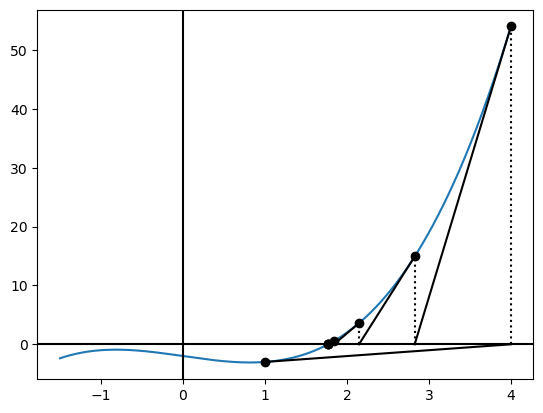

In [13]:
guess = 1

newtonRaphson(f, fPrime, guess, -1.5, 4)

### Secant method

The NR method requires that we know the derivative of the function whose roots we seek.  If we don't have the analytical form of the derivative, we can resort to numerical techniques.

A common method involving numerical derivatives is the secant method.  The method makes use of the calculated values of $f(x)$ for two sequential iterations to approximate the slope of the function, and extrapolates to obtain a new guess using this value.

The secant method has similar advantages and disadvanatges as the NR method.

## Exercise

The biochemical process of glycolysis (the breakdown of glucose in the body to release energy) can be modeled by the equations:

\begin{align}
\frac{dx}{dt}&=-x +ay+x^2y\\
\frac{dy}{dt}&=b-ay-x^2 y
\end{align}

Here $x$ and $y$ represent the concentrations of ADP and F6P, and $a$ and $b$ are positive constants.

We wish to find the "stationary points" of these equations, meaning the values of $x$ and $y$ for which the derivatives of both variables become zero, so that the concentrations of $x$ and $y$ both become consant in time.  In other words, we wish to solve the system of equations:

\begin{align}
0&=-x +ay+x^2y\\
0&=b-ay-x^2 y
\end{align}

Write a program which uses the relaxation method to solve these simultaneously to find the stationary point for $x$ and $y$ with $a=1$ and $b=2$. 

<details>
    <summary style="display:list-item">Click for hint</summary>

First, we must rearrange the equations into the form $x=f_1(x,y)$ and $y=f_2(x,y)$.  One way to do so is:
\begin{align}
    x &= ay+x^2y\\
    y &= \frac{b}{(a + x^2)}
\end{align}
    
However, in this form, the relaxation method fails to converge.  Instead, try solving the first (second) equation for y (x).    
</details>

<details>
    <summary style="display:list-item">Click for solution</summary>

First, we rearrange the equations into the form $x=f_1(x,y)$ and $y=f_2(x,y)$.  One way to do so is:
\begin{align}
    x &= \sqrt{\frac{b-ay}{y}}\\
    y &= \frac{x}{(a + x^2)}
\end{align}
    
In this form, the relaxation method takes the form:
    
```python
a = 1
b = 2

def f1(x,y):
    return math.sqrt((b-a*y)/y)

def f2(x, y):
    return x/(a + x*x)

relaxation2(f1, f2, 1, 1)
```
<br> 
And we find the fixed points are $x=2$ and $y=0.4$.
    
</details>

## Minima and maxima

The methods to find minima of a function are somewhat similar to the methods for finding roots.  We will focus on finding minima; finding the maxima of $f(x)$ is equivalent to finding the minima of $-f(x)$, so they are really the same problem.

<center>
<div>
    <img src="../Images/fig6-8.png" width="500"/>
</div>
</center>

A function can have several minima, in which case we distinguish between "local" (smaller than elsewhere in the vicinity) and "global" minima (smaller than anywhere else).  Both local and global minima are interesting in different physics contexts.  

### Brute force

The most straightforward numerical approach to finding minima follows closely the method for analytically finding minima.  Assuming we have the analytical form of a function $f(x)$, we can find its minima by requiring the derivative to equal zero.  Whether this constraint results in a linear or non-linear equation, we have learned techniques to solve it.

### Golden ratio method

If the function $f(x)$ is not specified analytically, the golden ratio method is useful.  It is capable of finding both local and global minima, but can't distinguish between them.

The golden ratio method is closely related to the binary search method.  In the binary search method for finding roots, we choose two exterior points and a third interior point.  By comparing the sign of the function evaluated at each of these three points, we are able to narrow down the region in which the root lies.  We then repeat this iterative process until the search interval becomes sufficiently small.

The golden ratio method for finding minima relies on a similar strategy, utilizing four points $x_{0\textrm{-}3}$.

<center>
<div>
    <img src="../Images/fig6-9.png" width="500"/>
</div>
</center>

We begin by evaluating $f(x)$ at each of these points.  If the value $f(x_i)$ for either of the interior points ($i=1,2$) is less than the value for both exterior points ($i=0,3$), then we know there must be a minimum somewhere within the interval (assuming the function is continuous).  

We then narrow down our search region by comparing $f(x_1)$ and $f(x_2)$.  If there is a single minimum in the search region, and $f(x_1)$ is smaller than $f(x_2)$, then we can conclude that the minimum must lie somewhere between $x_0$ and $x_2$.  We disregard $x_3$ and consider a new interior point somewhere in the region $x_0$-$x_2$.  If instead $f(x_1)$ is larger than $f(x_2)$, then we can conclude that the minimum must lie somewhere between $x_1$ and $x_3$.  We disregard $x_0$ and consider a new interior point somewhere in the region $x_1$-$x_3$.

We repeat this process many times until the search region becomes sufficiently small, at which point we take the center of the region to be our solution.

---------------

In order to make the method as efficient as possible, we minimize the number of times we evaluate $f(x)$ by reusing both interior points on subsequent iterations (one remains an interior point, the other becomes an exterior point).  We also carefully choose the position of the interior points.  Since there is no reason to believe that the minimum is more likely to fall in the left half of our interval or the right half, we assign the interior points symmetrically about the center. 

If we put both interior points near the midpoint of the interval, we can reject almost half of the interval in one iteration.  However, the next iteration will exclude a very small region. 

<center>
<div>
    <img src="../Images/goldenRatio1.png" width="500"/>
</div>
</center>

If we instead put both interior points near the exterior points, we will again only be able to exclude a small region.  

<center>
<div>
    <img src="../Images/goldenRatio2.png" width="500"/>
</div>
</center>

As derived in the textbook, there is a happy medium that is related to the golden ratio $r_g=\frac{1+\sqrt{5}}{2}$.  In short, the interior points should be a distance $\frac{x_3-x_0}{r_g}$ away from the exterior points. 

In [14]:
def f(x): 
    return (x-1)**2

def goldenRatio(f, a, b, tolerance=1e-10):
    
    rG = (1 + math.sqrt(5))/2   #golden ratio

    #calculate initial x values and corresponding values f(x)
    x = np.array([a, b - (1/rG)*(b-a), a + (1/rG)*(b-a), b], float)
    fx = np.array(list(map(f, x)), float)
    
    #make sure that either f(x1) or f(x2) is less than both f(x0) and f(x3) - otherwise no minimum
    if not ( (fx[1]<fx[0] and fx[1]<fx[3]) or (fx[2]<fx[0] and fx[2]<fx[3]) ): print("ERROR: no minimum in range ({} - {})".format(x[0],x[-1]))
    
    #iterate as long as interval is wider than tolerance
    while x[-1] - x[0] > tolerance:
        
        print(x)
    
        if fx[1]<fx[2]:
            x[3]  = x[2]   #update x3 to x2
            fx[3] = fx[2]
            
            x[2]  = x[1]   #update x2 to x1
            fx[2] = fx[1]
            
            x[1]  = x[3] - (1/rG)*(x[3]-x[0])   #calculate new interior point
            fx[1] = f(x[1])                     #calculate f(x) for the new interior point
        else:
            x[0]  = x[1]   #update x0 to x1
            fx[0] = fx[1]
            
            x[1]  = x[2]   #update x1 to x2
            fx[1] = fx[2]

            x[2]  = x[0] + (1/rG)*(x[3]-x[0])   #calculate new interior point
            fx[2] = f(x[2])                     #calculate f(x) for the new interior point
            
    print("\nMinimum at x =",(x[0] + x[-1])/2)   #take the midpoint of the interval as the minimum
    
goldenRatio(f, 0, 5)

[0.         1.90983006 3.09016994 5.        ]
[0.         1.18033989 1.90983006 3.09016994]
[0.         0.72949017 1.18033989 1.90983006]
[0.72949017 1.18033989 1.45898034 1.90983006]
[0.72949017 1.00813062 1.18033989 1.45898034]
[0.72949017 0.90169944 1.00813062 1.18033989]
[0.90169944 1.00813062 1.07390871 1.18033989]
[0.90169944 0.96747752 1.00813062 1.07390871]
[0.96747752 1.00813062 1.03325561 1.07390871]
[0.96747752 0.99260252 1.00813062 1.03325561]
[0.96747752 0.98300563 0.99260252 1.00813062]
[0.98300563 0.99260252 0.99853373 1.00813062]
[0.99260252 0.99853373 1.00219941 1.00813062]
[0.99260252 0.99626821 0.99853373 1.00219941]
[0.99626821 0.99853373 0.99993389 1.00219941]
[0.99853373 0.99993389 1.00079924 1.00219941]
[0.99853373 0.99939908 0.99993389 1.00079924]
[0.99939908 0.99993389 1.00026443 1.00079924]
[0.99939908 0.99972961 0.99993389 1.00026443]
[0.99972961 0.99993389 1.00006015 1.00026443]
[0.99993389 1.00006015 1.00013817 1.00026443]
[0.99993389 1.00001192 1.00006015 